In [1]:
import numpy as np

from AMAT.planet import Planet
from AMAT.vehicle import Vehicle
from AMAT.approach import Approach
from AMAT.orbiter import Orbiter

In [2]:
probe1 = Approach("MARS",v_inf_vec_icrf_kms=np.array([ 2.23930484,  1.20086474, -0.73683366]),
                        rp=(3389.5+52)*1e3, psi=3*np.pi/2,
                        is_entrySystem=True, h_EI=120e3)

In [3]:
# approach trajectory
theta_star_arr_probe1 = np.linspace(-1.9, probe1.theta_star_entry, 101)
pos_vec_bi_arr_probe1 = probe1.pos_vec_bi(theta_star_arr_probe1) / 3389.5e3

x_arr_probe1 = pos_vec_bi_arr_probe1[0][:]
y_arr_probe1 = pos_vec_bi_arr_probe1[1][:]
z_arr_probe1 = pos_vec_bi_arr_probe1[2][:]

In [12]:
planet = Planet('MARS')
planet.loadAtmosphereModel('../../../atmdata/Mars/mars-gram-avg.dat', 0 , 1 ,2, 3)
planet.h_skip = 120.0E3

# Set up a vehicle object
vehicle1=Vehicle('MarsSmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.1, planet)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 7.5)

# propagate a guided trajectory
# Set planet.h_low to 10 km, if vehicle dips below this level
# trajctory is terminated.
planet.h_low=10.0E3

# Set target orbit = 2000 km x 2000 km, tolerance = 20 km
# target apo intentionally set to slightly higher value to account for bias in guidance
vehicle1.setTargetOrbitParams(200.0, 2200.0, 20.0)

# Set entry phase parameters
# v_switch_kms = 2.0, lowAlt_km = 20.0, 
# numPoints_lowAlt = 101, hdot_threshold = -200.0 m/s.
# These are somewhat arbitary based on experience.
vehicle1.setDragEntryPhaseParams(2.0, 20.0, 101, -200.0)


# Set beta_1 and beta_ratio
vehicle1.setDragModulationVehicleParams(20, 7.5)

# Set vehicle initial state
vehicle1.setInitialState(120.0, -89.76, -0.71, 5.3581, 1.60, -9.2475, 0.0, 0.0)
# Propogate a single vehicle trajectory
vehicle1.propogateGuidedEntryD2(1.0,1.0,0.1,2400.0)

In [13]:
vehicle1.terminal_apoapsis

1626.103650615382

In [14]:
orbiter = Orbiter(vehicle1, peri_alt_km=200.0)

# print the periapsis raise manuever DV
print("PRM DV VEC, m/s: "+str(orbiter.PRM_dv_vec))
print("PRM DV MAG, m/s: "+str(orbiter.PRM_dv_mag))

PRM DV VEC, m/s: [-33.60565425  -6.47551312  -0.96546336]
PRM DV MAG, m/s: 34.23747051280374


In [15]:
orbiter.i*180/np.pi

1.6518884900177817

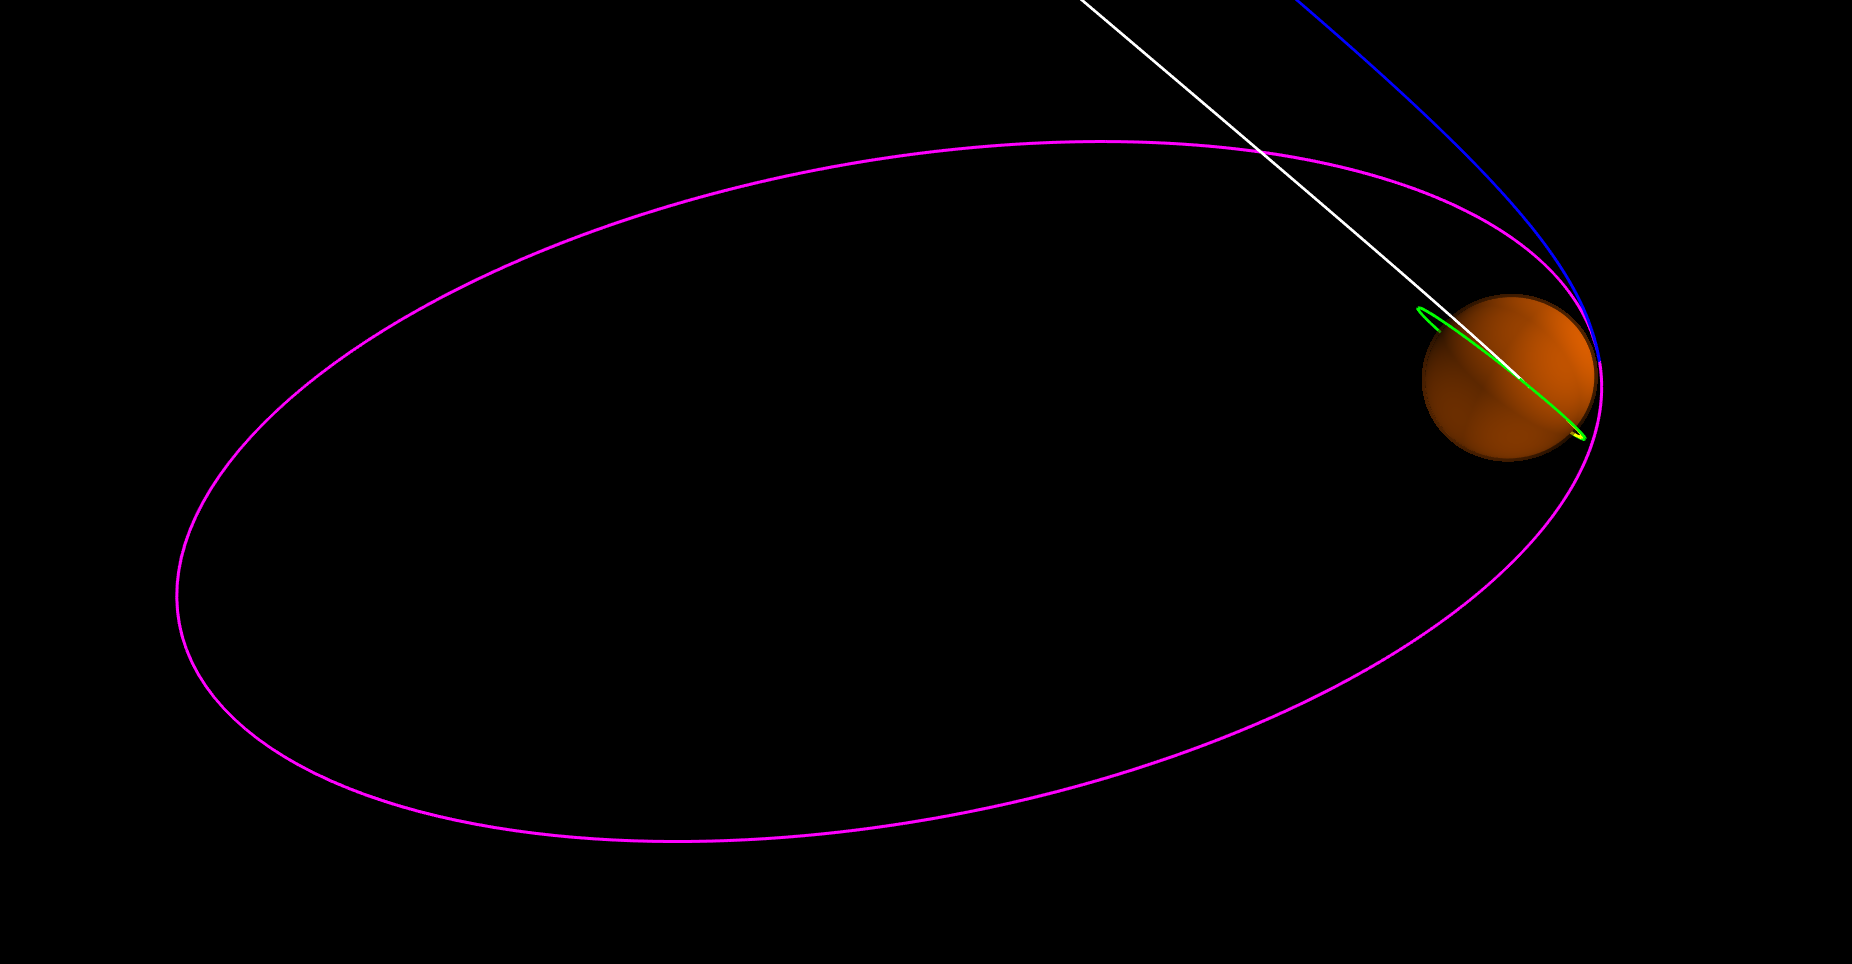

In [16]:
from IPython.display import Image
Image(filename='../../../plots/smallsat-and-orbiter-orbits.png', width=1200)